### 데이터 로드

In [49]:
pd.set_option('display.max_row', 300)
pd.set_option('display.max_column', 100)

In [3]:
df_orders = pd.read_csv("origin/orders.csv")
df_order_products = pd.read_csv("origin/merged_order_products.csv")
df_ptoducts = pd.read_csv("origin/products.csv") #
df_aisles = pd.read_csv("origin/aisles.csv")#
df_departments = pd.read_csv("origin/departments.csv") #

In [4]:
len(df_order_products)

33819106

In [5]:
len(df_orders)

3421083

### order.csv
- order_id : 주문 ID
- user_id : 이용자 ID
- eval_set : Train, Prior 구분자
- order_number : 
- order_dow : 요일 (0~6)
- order_hour_of_day : 주문한 날의 시간 (0~23)
- days_since_prior_order : 이전 주문으로 부터 날짜. (생각해볼만한)

### merged_order_products.csv
- order_id : 주문 ID
- product_id : 물건 ID
- add_to_cart_order : 
- reordered : 재주문 여부(0,1)

In [6]:
# csv파일 불러오면서 생긴 불필요한 컬럼 삭제
df_order_products = df_order_products.drop(axis=1,labels='Unnamed: 0')

### products.csv
- product_id : 물건 ID
- product_name : 물건 이름
- aisle_id : 대분류(통로) ID
- department_id : 카테고리별(품목별) ID

### aisles.csv
- aisle_id : 대분류(통로) ID
- asile : 대분류(통로) 이름

### departments.csv
- department_id : 카테고리별(품목별) ID
- department : 카테고리 명

### 데이터 프레임 merge

In [7]:
product_plus_aisle = pd.merge(df_ptoducts,df_aisles)
product_plus_aisle_plus_departments = pd.merge(product_plus_aisle,df_departments)
product_plus_aisle_plus_departments_plus_order_products = pd.merge(product_plus_aisle_plus_departments,df_order_products)
raw_data = pd.merge(product_plus_aisle_plus_departments_plus_order_products,df_orders)

In [439]:
raw_data

,product_id,product_name,aisle_id,department_id,aisle,department,Unnamed: 0,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,11000,1107,7,0,38259,prior,2,1,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,11001,1107,6,0,38259,prior,2,1,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,11005,1107,2,0,38259,prior,2,1,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,10998,1107,10,0,38259,prior,2,1,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,10999,1107,9,0,38259,prior,2,1,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,22973657,2323735,1,1,90235,prior,30,3,10,1.0
33819102,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,27025726,2733396,1,0,30511,prior,24,4,11,0.0
33819103,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,31163823,3152383,1,0,10113,train,12,3,19,13.0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,312067,31522,1,1,31188,prior,3,3,11,4.0


### 시간 요일별 구매 횟수

In [247]:
df = pd.pivot_table(raw_data,index = raw_data['order_dow'], columns = raw_data['order_hour_of_day'], aggfunc='count',values='user_id')

In [248]:
df = df / 1000
df = df.astype("int")

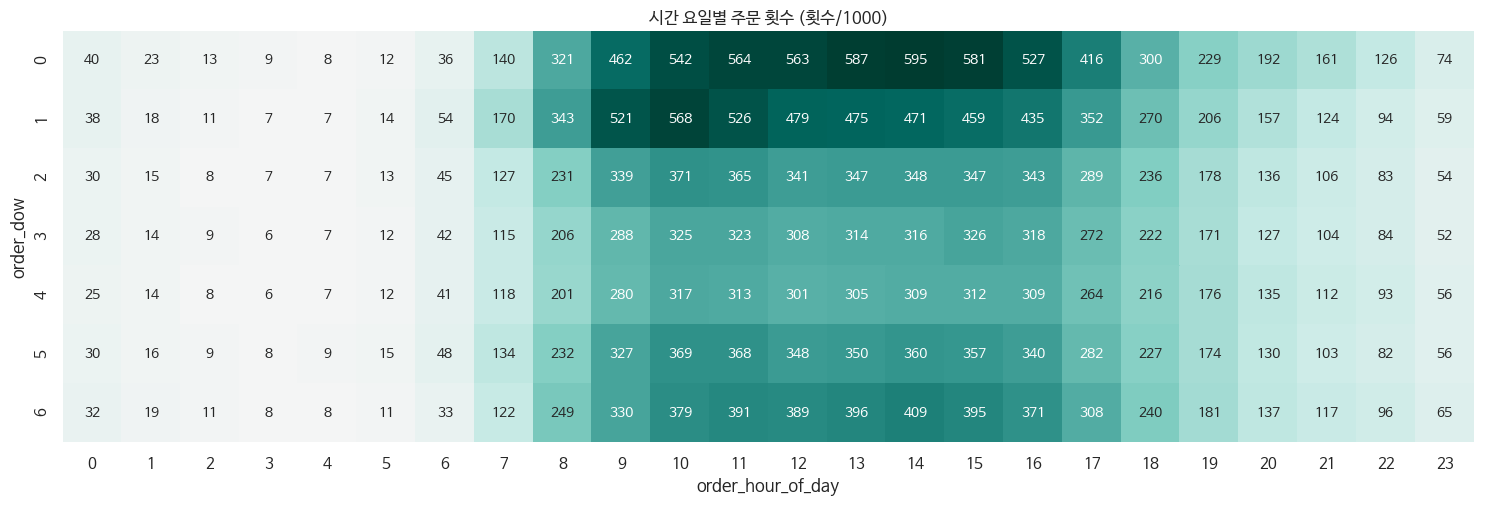

In [261]:
plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_title('시간 요일별 주문 횟수 (횟수/1000)')
sns.heatmap(df,cmap="BrBG",center=3, annot=True, fmt="d",square=True,cbar=False,ax=ax)
plt.tight_layout()
plt.show()

In [306]:
## 유저당 오더건수(유저들은 몇시에 오더를 제일 많이 넣는가)
raw_data.tail()

,product_id,product_name,aisle_id,department_id,aisle,department,Unnamed: 0,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
33819101,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,22973657,2323735,1,1,90235,prior,30,3,10,1.0
33819102,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,27025726,2733396,1,0,30511,prior,24,4,11,0.0
33819103,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,31163823,3152383,1,0,10113,train,12,3,19,13.0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,312067,31522,1,1,31188,prior,3,3,11,4.0
33819105,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,24559929,2484167,1,1,31188,prior,7,2,11,10.0


### 요일별 잘나가는 상품 품목

In [223]:
df = pd.pivot_table(raw_data,index = raw_data['product_name'], columns = raw_data['order_dow'], aggfunc='count',values='user_id')

In [224]:
result =[]
for i in range(0,7):
    a = df[i].sort_values(ascending=False)[:11].index
    result.append(a)

In [225]:
result_df = pd.DataFrame(result)
result_df

,0,1,2,3,4,5,6,7,8,9,10
0,Banana,Bag of Organic Bananas,Organic Baby Spinach,Organic Strawberries,Organic Hass Avocado,Organic Avocado,Large Lemon,Limes,Strawberries,Organic Raspberries,Organic Whole Milk
1,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Large Lemon,Strawberries,Organic Raspberries,Organic Whole Milk,Limes
2,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Large Lemon,Strawberries,Organic Whole Milk,Organic Raspberries,Limes
3,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Strawberries,Organic Whole Milk,Large Lemon,Organic Raspberries,Limes
4,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Strawberries,Organic Whole Milk,Large Lemon,Organic Raspberries,Limes
5,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Large Lemon,Strawberries,Limes,Organic Raspberries,Organic Whole Milk
6,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Large Lemon,Limes,Organic Whole Milk,Strawberries,Organic Raspberries


### 시간대별 잘나가는 품목

In [309]:
df = pd.pivot_table(raw_data,index = raw_data['product_name'], columns = raw_data['order_hour_of_day'], aggfunc='count',values='user_id')

In [335]:
result =[]
for i in range(0,24):
    a = df[i].sort_values(ascending=False)[:10].index
    result.append(a)

In [336]:
hourly_product = pd.DataFrame(result)

In [337]:
hourly_product

,0,1,2,3,4,5,6,7,8,9
0,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Large Lemon,Limes,Strawberries,Organic Raspberries
1,Banana,Bag of Organic Bananas,Organic Baby Spinach,Organic Strawberries,Organic Hass Avocado,Organic Avocado,Large Lemon,Limes,Strawberries,Organic Raspberries
2,Banana,Bag of Organic Bananas,Organic Baby Spinach,Organic Strawberries,Organic Hass Avocado,Organic Avocado,Large Lemon,Strawberries,Limes,Organic Raspberries
3,Banana,Bag of Organic Bananas,Organic Baby Spinach,Organic Strawberries,Organic Hass Avocado,Organic Avocado,Large Lemon,Limes,Strawberries,Organic Garlic
4,Banana,Bag of Organic Bananas,Organic Baby Spinach,Organic Strawberries,Organic Hass Avocado,Large Lemon,Organic Avocado,Strawberries,Limes,Organic Raspberries
5,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Strawberries,Large Lemon,Organic Avocado,Organic Raspberries,Organic Whole Milk
6,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Whole Milk,Organic Avocado,Strawberries,Organic Raspberries,Large Lemon
7,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Whole Milk,Organic Avocado,Organic Raspberries,Strawberries,Large Lemon
8,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Organic Whole Milk,Organic Raspberries,Strawberries,Large Lemon
9,Banana,Bag of Organic Bananas,Organic Strawberries,Organic Baby Spinach,Organic Hass Avocado,Organic Avocado,Strawberries,Large Lemon,Organic Raspberries,Organic Whole Milk


## 전체 재구매율

In [12]:
# 전체 재구매율
raw_data["reordered"].sum() / len(raw_data["reordered"])

0.5900617242809434

## aisle 별 재구매율

In [8]:
result = []
for i in range(1,len(df_aisles)+1):
    reorder_rate = raw_data[raw_data["aisle_id"] == i]["reordered"].sum() / len(raw_data[raw_data["aisle_id"] == i]["reordered"])
    aisle_name = df_aisles.iloc[i-1].values[1]
    result.append({reorder_rate,aisle_name}) 

In [15]:
aisle_reorder_rate = pd.DataFrame(result).sort_values(by=0,ascending=False)
aisle_reorder_rate_sort_by_name = aisle_reorder_rate.sort_values(by=1,ascending=False)
aisle_reorder_rate_sort_by_name.rename(columns={0:"reoreder_rate",1:"aisle"}).reset_index(drop=True)

,reoreder_rate,aisle
0,0.686501,yogurt
1,0.631928,white wines
2,0.729930,water seltzer sparkling water
3,0.312176,vitamins supplements
4,0.336983,trash bags liners
...,...,...
129,0.589005,baby food formula
130,0.294758,baby bath body care
131,0.551500,baby accessories
132,0.351274,asian foods


In [16]:
aisle_reorder_rate_sort_by_name

,0,1
119,0.686501,yogurt
61,0.631928,white wines
114,0.729930,water seltzer sparkling water
46,0.312176,vitamins supplements
59,0.336983,trash bags liners
...,...,...
91,0.589005,baby food formula
101,0.294758,baby bath body care
81,0.551500,baby accessories
65,0.351274,asian foods


## aisle별 구매 등수

In [153]:
sellcount_by_aisle = raw_data['aisle'].sort_values().value_counts()

In [154]:
sellcount_by_aisle = pd.DataFrame(top_products)
sellcount_by_aisle = sellcount_by_aisle.reset_index()

In [158]:
sellcount_by_aisle = sellcount_by_aisle.sort_values(by="count",ascending=False)

In [161]:
sellcount_by_aisle_sort_by_name = sellcount_by_aisle.sort_values(by="aisle_name",ascending=False)
sellcount_by_aisle_sort_by_name

,index,aisle_name,count
0,3,yogurt,1507583
1,102,white wines,31646
2,6,water seltzer sparkling water,878150
3,87,vitamins supplements,47028
4,100,trash bags liners,33702
5,95,trail mix snack mix,37053
6,49,tortillas flat bread,201650
7,57,tofu meat alternatives,134597
8,38,tea,258717
9,32,spreads,301502


## 구매 횟수와 재구매율의 상관관계 by aisle

In [163]:
np.corrcoef(sellcount_by_aisle_sort_by_name['count'],aisle_reorder_rate_sort_by_name[0])[0,1]

0.3800668304845539

In [389]:
from sklearn import preprocessing

## Department 별 재구매율

In [191]:
result = []
for i in range(1,22):
    reorder_rate = (raw_data[raw_data['department_id'] == i]['reordered'].sum() / len(raw_data[raw_data['department_id'] == i]['reordered']))
    departmen_name= df_departments.iloc[i-1].values[1]
    result.append({reorder_rate,departmen_name})

In [192]:
department_reorder_rate = pd.DataFrame(result)

In [193]:
department_reorder_rate.columns = ['reorder_rate','departments']
department_reorder_rate = department_reorder_rate.sort_values('reorder_rate',ascending=False).reset_index(drop=True)

In [194]:
department_reorder_rate_sort_by_name = department_reorder_rate.sort_values(by="departments",ascending=False)
department_reorder_rate_sort_by_name

,reorder_rate,departments
8,0.574464,snacks
2,0.650521,produce
5,0.602557,pets
20,0.321863,personal care
19,0.347400,pantry
15,0.407052,other
17,0.394323,missing
10,0.568625,meat seafood
18,0.369682,international
16,0.403339,household


## Department별 구매등수

In [170]:
sellcount_by_department = raw_data['department'].sort_values().value_counts()

In [175]:
sellcount_by_department = pd.DataFrame(sellcount_by_department).reset_index()

In [179]:
sellcount_by_department.columns = ['department','count']
sellcount_by_department

,department,count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


In [180]:
sellcount_by_department_sort_by_name = sellcount_by_department.sort_values(by='department',ascending=False)

In [187]:
sellcount_by_department_sort_by_name

,department,count
2,snacks,3006412
0,produce,9888378
17,pets,102221
13,personal care,468693
5,pantry,1956819
19,other,38086
18,missing,77396
11,meat seafood,739238
15,international,281155
10,household,774652


##  구매 횟수와 재구매율의 상관관계 by department

In [198]:
np.corrcoef(department_reorder_rate_sort_by_name["reorder_rate"],sellcount_by_department_sort_by_name['count'])[0,1]

0.45383243013817653

In [202]:
print("구매 횟수와 재구매율의 상관관계 by department", np.corrcoef(department_reorder_rate_sort_by_name["reorder_rate"],sellcount_by_department_sort_by_name['count'])[0,1])
print("구매 횟수와 재구매율의 상관관계 by aisle",np.corrcoef(sellcount_by_aisle_sort_by_name['count'],aisle_reorder_rate_sort_by_name[0])[0,1])

구매 횟수와 재구매율의 상관관계 by department 0.45383243013817653
구매 횟수와 재구매율의 상관관계 by aisle 0.3800668304845539


## missing 제외 상관계수

In [229]:
print("구매 횟수와 재구매율의 상관관계 by department without missing",np.corrcoef(department_reorder_rate_sort_by_name[department_reorder_rate_sort_by_name['departments'] != "missing"]['reorder_rate'],sellcount_by_department_sort_by_name[sellcount_by_department_sort_by_name['department'] != "missing"]['count'])[0,1])

print("구매 횟수와 재구매율의 상관관계 by aisle without missing",np.corrcoef(aisle_reorder_rate_sort_by_name[aisle_reorder_rate_sort_by_name[1] != "missing"][0],sellcount_by_aisle_sort_by_name[sellcount_by_aisle_sort_by_name['aisle_name'] != "missing"]['count'])[0,1])

구매 횟수와 재구매율의 상관관계 by department without missing 0.43412940102828723
구매 횟수와 재구매율의 상관관계 by aisle without missing 0.37913556663933523


NameError: name 'sellcount_by_aisle_sort_by_name' is not defined

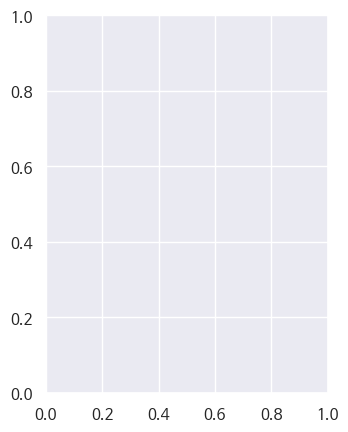

In [18]:
from sklearn import preprocessing
plt.subplot(121)
plt.plot(preprocessing.minmax_scale(sellcount_by_aisle_sort_by_name['count'].sort_values()),  # x
 # y
        aisle_reorder_rate_sort_by_name[0],
         linestyle='none', 

         marker='o', 

         markersize=10,

         color='blue', 

         alpha=0.5)


plt.subplot(122)
plt.plot(
        preprocessing.minmax_scale(sellcount_by_aisle_sort_by_name[sellcount_by_aisle_sort_by_name['aisle_name'] != "missing"]['count']), 
    aisle_reorder_rate_sort_by_name[aisle_reorder_rate_sort_by_name[1] != "missing"][0],
        
        linestyle='none', 

         marker='o', 

         markersize=10,

         color='blue', 

         alpha=0.5)
plt.show()


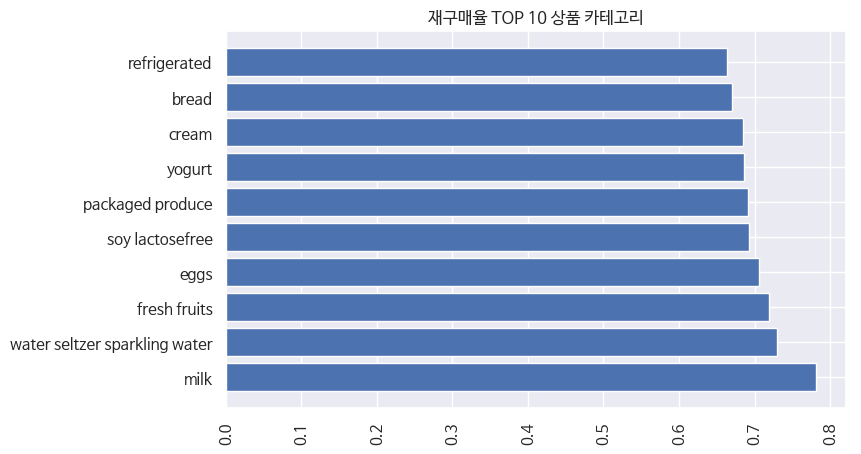

In [132]:
aisle_reorder_rate_sort_by_rate = aisle_reorder_rate.sort_values(by='reorder_rate',ascending=False)
y1_value = aisle_reorder_rate_sort_by_rate['reorder_rate'][:10]
x_name= aisle_reorder_rate_sort_by_rate['departments'][:10]
n_groups = len(x_name)
index = np.arange(n_groups)
plt.barh(index, y1_value, tick_label=x_name,align='center')
plt.xticks(rotation=90)
plt.title("재구매율 TOP 10 상품 카테고리")
plt.show()

In [219]:
### 많이 팔린 품목 상위 10등

In [54]:
top_products = raw_data['aisle'].sort_values().value_counts()
top_products[0:30]

fresh fruits                     3792661
fresh vegetables                 3568630
packaged vegetables fruits       1843806
yogurt                           1507583
packaged cheese                  1021462
milk                              923659
water seltzer sparkling water     878150
chips pretzels                    753739
soy lactosefree                   664493
bread                             608469
refrigerated                      599109
frozen produce                    545107
ice cream ice                     521101
crackers                          478430
energy granola bars               473835
eggs                              472009
lunch meat                        412087
frozen meals                      408520
baby food formula                 395654
fresh herbs                       393793
cereal                            393787
soft drinks                       373816
fresh dips tapenades              370827
soup broth bouillon               361573
juice nectars   

In [234]:
## 상위 20개 품목의 퍼센트
(top_products[0:65].values.sum() / len(raw_data['aisle'])) * 100

91.38167342448378

In [302]:
top_products

fresh fruits                  3792661
fresh vegetables              3568630
packaged vegetables fruits    1843806
yogurt                        1507583
packaged cheese               1021462
                               ...   
eye ear care                     9522
baby bath body care              8909
baby accessories                 8466
beauty                           6455
frozen juice                     5147
Name: aisle, Length: 134, dtype: int64

In [278]:
df = raw_data.pivot_table(index=['department','aisle'],values='aisle_id',aggfunc='count')

In [386]:
pd.set_option('display.max_row',200)

In [359]:
df2 = df2.reset_index()
df2 = df2.rename(columns={"index":"aisle"}, inplace = True) 
df2

In [153]:
# 베지테리언용 고기
# muscles joints pain relie
# 
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [159]:
raw_product_aisle = pd.merge(df_ptoducts,df_aisles)
df = pd.merge(raw_product_aisle,df_departments)
df = pd.merge(df,df_order_products)
df = pd.merge(df,df_orders)

In [163]:
pd.pivot_table(df,index=df['user_id'],columns=df['reordered'],aggfunc="count",values='aisle')

reordered,0,1
user_id,,
1,18.0,41.0
2,102.0,93.0
3,33.0,55.0
4,17.0,1.0
5,23.0,14.0
...,...,...
206205,24.0,8.0
206206,150.0,135.0
206207,92.0,131.0


In [161]:
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,1107,6,0,38259,prior,2,1,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,1107,2,0,38259,prior,2,1,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,1107,10,0,38259,prior,2,1,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,1107,9,0,38259,prior,2,1,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2235830,1,0,183048,prior,13,2,11,6.0
32434485,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
32434486,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2733396,1,0,30511,prior,24,4,11,0.0
32434487,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,31522,1,1,31188,prior,3,3,11,4.0


In [144]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [143]:
df_ptoducts

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [142]:
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [141]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [119]:
# 술 department
alchohol_product = df_ptoducts[df_ptoducts['department_id'].isin([5])]

In [120]:
# 인덱스 제거
alchohol_product = alchohol_product.reset_index(drop=True)
alchohol_product

,product_id,product_name,aisle_id,department_id
0,52,Mirabelle Brut Rose,134,5
1,119,Chardonnay Paso Robles,62,5
2,150,Brut Rosé,134,5
3,234,Tennessee Whiskey,124,5
4,249,"Pinot Grigio, California, 2010",62,5
...,...,...,...,...
1049,49544,Cabernet Sauvignon Wine,28,5
1050,49562,Blanc De Noirs Sparkling Wine,134,5
1051,49606,Organic Natural Red,28,5
1052,49661,Porto,134,5


In [121]:
# 술의 product_id로 술 종류를 주문한 order_id를 찾아냄
order_alchohol_order_id = df_order_products[df_order_products['product_id'].isin(alchohol_product['product_id'].values)]

In [123]:
order_alchohol_order_id

,order_id,product_id,add_to_cart_order,reordered
112,13,17330,1,0
114,13,35419,3,0
1704,191,24325,1,1
1705,191,41391,2,1
1736,194,3149,1,0
...,...,...,...,...
32432612,3420883,20704,1,0
32433070,3420931,31154,7,1
32433372,3420958,16326,2,1
32433515,3420978,33065,1,0


In [124]:
order_alchohol = df_orders[df_orders['order_id'].isin(order_alchohol_order_id.reset_index(drop=True)['order_id'].values)]

In [125]:
order_alchohol

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
40,2030307,4,prior,2,4,11,19.0
42,94891,4,prior,4,5,13,15.0
116,2906263,14,prior,1,2,18,NaN
117,3206747,14,prior,2,5,8,30.0
118,1366559,14,prior,3,0,14,2.0
...,...,...,...,...,...,...,...
3420381,544844,206166,prior,13,5,18,2.0
3420382,2562672,206166,prior,14,1,17,3.0
3420383,2336901,206166,prior,15,3,16,2.0
3420384,705561,206166,prior,16,2,19,6.0


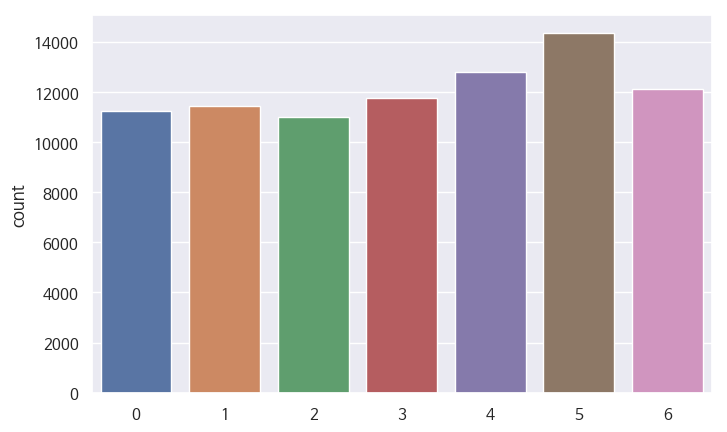

In [139]:
sns.countplot(order_alchohol['order_dow'].values)

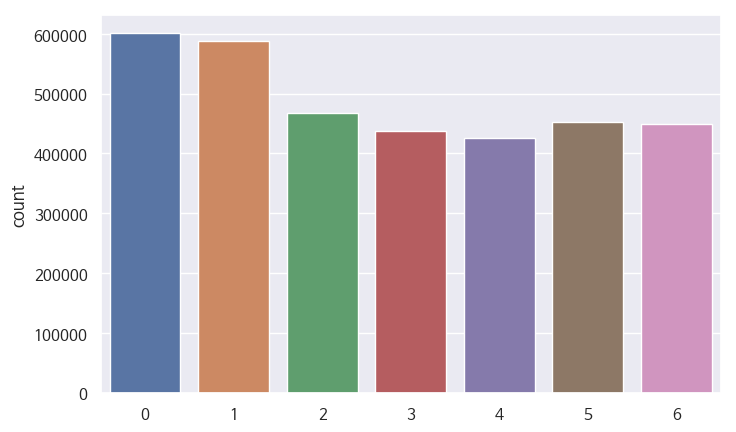

In [140]:
sns.countplot(df_orders['order_dow'].values)